# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [155]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [156]:
# Create lists

city = []
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = [] 

records = 1
#set_counter = 1 

print("Beginning Data Retrieval")
print("-----------------------------") 

# enumerate gives out index and value
# for i, citi in enumerate(cities)
    # if i modulus == 50 & i > 50:
        # set_counter += 1 
        # time.sleep(5.1)
    # url = f"http://api.openweathermap.org/data/2.5/weather?q={citi}&appid={weather_api_key}&units=imperial"
    # response = requests.get(url).json()

for citi in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={citi}&appid={weather_api_key}&units=imperial"
    response = requests.get(url).json()
    time.sleep(1.1)
    try: 

    #print(json.dumps(response, indent=4, sort_keys=True))
    #pprint(response)
        city.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f'processing record {records} | {citi}') 
        records += 1
    except KeyError:
        print("city not found, skipping to next...")



Beginning Data Retrieval
-----------------------------
processing record 1 | coruripe
processing record 2 | georgetown
processing record 3 | petropavlovsk-kamchatskiy
processing record 4 | hilo
processing record 5 | cape town
processing record 6 | komsomolskiy
processing record 7 | olinda
processing record 8 | lohja
processing record 9 | albany
processing record 10 | hermanus
processing record 11 | grindavik
processing record 12 | vestmannaeyjar
processing record 13 | mataura
processing record 14 | renala khurd
processing record 15 | avarua
processing record 16 | vaini
processing record 17 | harper
processing record 18 | hobyo
processing record 19 | kincardine
processing record 20 | arraial do cabo
processing record 21 | tuktoyaktuk
processing record 22 | praia da vitoria
processing record 23 | ushuaia
processing record 24 | tessalit
city not found, skipping to next...
processing record 25 | atuona
processing record 26 | tiksi
processing record 27 | nikolskoye
processing record 28 | sa

processing record 227 | eureka
processing record 228 | half moon bay
processing record 229 | airai
processing record 230 | mogadishu
processing record 231 | berdigestyakh
processing record 232 | cabo san lucas
processing record 233 | lakselv
city not found, skipping to next...
processing record 234 | carbonia
processing record 235 | sitka
processing record 236 | dhidhdhoo
processing record 237 | starobaltachevo
processing record 238 | abu dhabi
processing record 239 | san ramon
processing record 240 | ankara
processing record 241 | behat
processing record 242 | klaksvik
processing record 243 | bara
processing record 244 | kupang
processing record 245 | dzialdowo
processing record 246 | nanortalik
processing record 247 | roma
processing record 248 | shilong
processing record 249 | svetlyy
processing record 250 | fort nelson
processing record 251 | kamenka
processing record 252 | sisimiut
processing record 253 | alofi
processing record 254 | biak
processing record 255 | kaitangata
proces

processing record 453 | te anau
processing record 454 | kabo
processing record 455 | tahe
processing record 456 | ostersund
processing record 457 | noumea
processing record 458 | road town
processing record 459 | maniitsoq
processing record 460 | pundaguitan
processing record 461 | mahina
processing record 462 | ust-kan
processing record 463 | missoula
processing record 464 | tikhvin
processing record 465 | mikulovice
processing record 466 | bollnas
processing record 467 | horta
processing record 468 | batticaloa
processing record 469 | jamame
processing record 470 | sola
processing record 471 | tagusao
city not found, skipping to next...
processing record 472 | marzuq
processing record 473 | lewisporte
processing record 474 | iralaya
processing record 475 | olovyannaya
processing record 476 | yetkul
processing record 477 | akyab
processing record 478 | carmen
processing record 479 | belaya gora
processing record 480 | mutare
processing record 481 | sabha
processing record 482 | pilten

In [157]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 59},
 'cod': 200,
 'coord': {'lat': -8.16, 'lon': -70.77},
 'dt': 1609266145,
 'id': 3661980,
 'main': {'feels_like': 91.63,
          'grnd_level': 989,
          'humidity': 76,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 83.48,
          'temp_max': 83.48,
          'temp_min': 83.48},
 'name': 'Tarauacá',
 'rain': {'1h': 0.95},
 'sys': {'country': 'BR', 'sunrise': 1609237649, 'sunset': 1609282979},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 301, 'speed': 4}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [161]:
# Display the DataFrame 

df = pd.DataFrame({"city": city, "latitude": lat, "longitude": lng, "max_temp": maxtemp, "humidity": humidity,
                   "cloudiness": cloudiness, "windspeed": windspeed, "country": country, "date": date
                  })

df.head() 




,city,latitude,longitude,max_temp,humidity,cloudiness,windspeed,country,date
0,Coruripe,-10.13,-36.18,82.00,57,19,12.06,BR,1609265448
1,George Town,5.41,100.34,81.00,83,20,3.36,MY,1609265449
2,Petropavlovsk-Kamchatskiy,53.05,158.65,6.80,71,93,6.71,RU,1609265450
3,Hilo,19.73,-155.09,69.80,60,1,6.93,US,1609265302
4,Cape Town,-33.93,18.42,71.01,64,20,16.11,ZA,1609265272


In [179]:
# Save to CSV 
df.to_csv("../output_data/weather_status.csv", index=False, header=True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [163]:
# Verify if any cities have humidity > 100% 

# Method 1:
df.sort_values(by='humidity', ascending=False)

# Method 2: 
humidity_100 = df.loc[df['humidity'] > 100]
humidity_100.shape[0]

print(f"There are no cities that have humiity over 100% within this sample dataset")

There are no cities that have humiity over 100% within this sample dataset


In [164]:
#  Get the indices of cities that have humidity over 100%.
print(f"Not applicable.")

Not applicable.


In [165]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"Not applicable.")

Not applicable.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

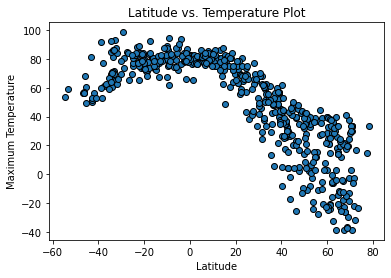

In [166]:
# Create the scatterplot

lat_temp = plt.scatter(df['latitude'],df['max_temp'],marker = "o", edgecolors="black") 
plt.title("Latitude vs. Temperature Plot") 
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

#Save Image

plt.savefig("../output_data/lat_temp.png")

## Latitude vs. Humidity Plot

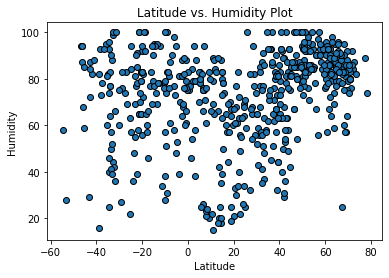

In [167]:
# Create the scatterplot

lat_humid = plt.scatter(df['latitude'],df['humidity'],marker = "o", edgecolors="black") 
plt.title("Latitude vs. Humidity Plot") 
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Save Image

plt.savefig("../output_data/lat_humid.png")

## Latitude vs. Cloudiness Plot

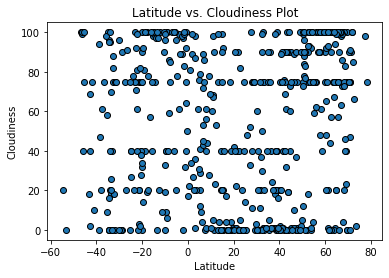

In [168]:
# Create the scatterplot

lat_cloud = plt.scatter(df['latitude'],df['cloudiness'],marker = "o", edgecolors="black") 
plt.title("Latitude vs. Cloudiness Plot") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Save Image

plt.savefig("../output_data/lat_cloud.png")

## Latitude vs. Wind Speed Plot

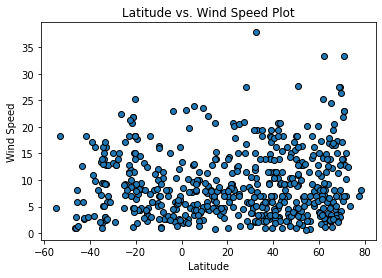

In [169]:
# Create the scatterplot 
lat_wind = plt.scatter(df['latitude'],df['windspeed'],marker = "o", edgecolors="black") 
plt.title("Latitude vs. Wind Speed Plot") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Save Image
plt.savefig("../output_data/lat_wind.png")

## Linear Regression

In [170]:
# The datatset (nested dictionaries) have no information specifically on hemisphere
    # If latitude > 0 --> hempisphere is Northern
    # If latitude < 0 --> hempisphere is Southern

# Create Northern and Southern Hemisphere DataFrames
northern_df = df.loc[pd.to_numeric(df["latitude"]).astype(float) > 0, :]
southern_df = df.loc[pd.to_numeric(df["latitude"]).astype(float) < 0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6958505484448977


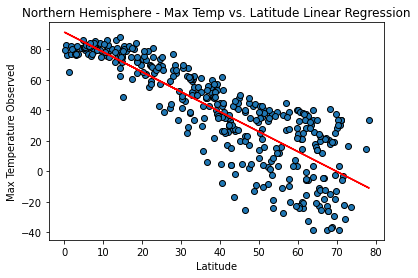

In [171]:
# Assign x and y variables
x_values = pd.to_numeric(northern_df["latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["max_temp"]).astype(float)

# Calculate linear regression - Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values, color="red")


# Annotate linear regression
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature Observed")

#Save Image
plt.savefig("../output_data/northern_temp_latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}") 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.32957173441889354


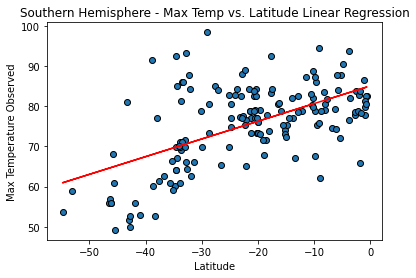

In [172]:
# Assign x and y variables
x_values = pd.to_numeric(southern_df["latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["max_temp"]).astype(float)

# Calculate linear regression - Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values, color="red")


# # Annotate linear regression
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature Observed")

#Save Image
plt.savefig("../output_data/southern_temp_latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}") 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19177168288612775


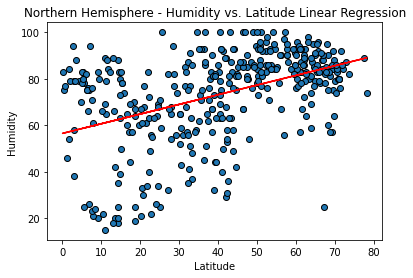

In [173]:
# Assign x and y variables
x_values = pd.to_numeric(northern_df["latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["humidity"]).astype(float)

# Calculate linear regression - Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values, color="red")


# # Annotate linear regression
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Save Image
plt.savefig("../output_data/northern_humidity_latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}") 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.005757126020958862


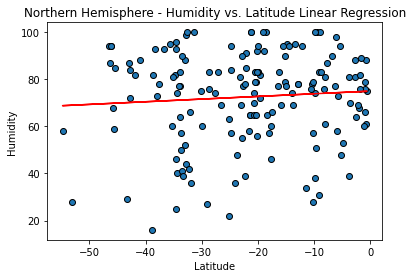

In [174]:
# Assign x and y variables
x_values = pd.to_numeric(southern_df["latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["humidity"]).astype(float)

# Calculate linear regression - Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values, color="red")


# # Annotate linear regression
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Save Image
plt.savefig("../output_data/southern_humidity_latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}") 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11210624326492315


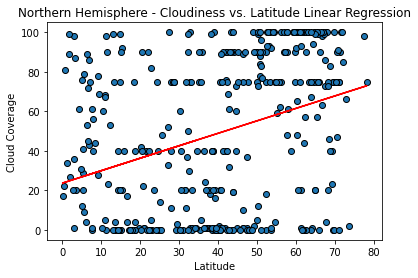

In [175]:
# Assign x and y variables
x_values = pd.to_numeric(northern_df["latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["cloudiness"]).astype(float)

# Calculate linear regression - Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values, color="red")


# # Annotate linear regression
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")

#Save Image
plt.savefig("../output_data/northern_clouds_latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}") 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04948409371533901


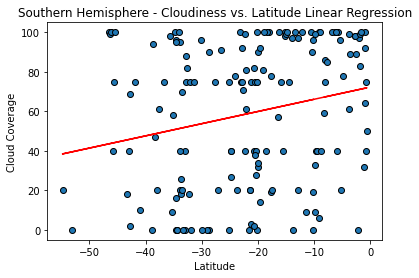

In [176]:
# Assign x and y variables
x_values = pd.to_numeric(southern_df["latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["cloudiness"]).astype(float)

# Calculate linear regression - Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values, color="red")


# # Annotate linear regression
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")

#Save Image
plt.savefig("../output_data/southern_clouds_latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}") 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.012381181502298262


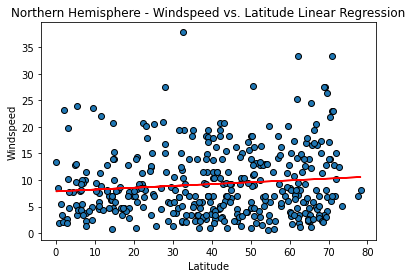

In [177]:
# Assign x and y variables
x_values = pd.to_numeric(northern_df["latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["windspeed"]).astype(float)

# Calculate linear regression - Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values, color="red")


# # Annotate linear regression
plt.title("Northern Hemisphere - Windspeed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")

#Save Image
plt.savefig("../output_data/northern_windspeed_latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}") 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.006261503335699372


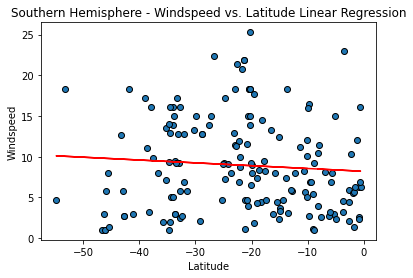

In [178]:
# Assign x and y variables
x_values = pd.to_numeric(southern_df["latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["windspeed"]).astype(float)

# Calculate linear regression - Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values, color="red")


# # Annotate linear regression
plt.title("Southern Hemisphere - Windspeed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")

#Save Image
plt.savefig("../output_data/southern_windspeed_latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}") 